## Problem 2 ##
We will fit curves by Least Squares. To make this more fun, we use a real example, Hubbles Law for the expansion of the universe:
From the article on Hubble’s law in Wikipedia: The law of expansion of the universe was predicted by Alexander Friedmann and discovered by Edwin Hubble in the 1920s. The great device for distance measures is ‘Type 1A’ supernovae, exploding stars having a very predictable energy which are used as ’cosmic standard candles’ to measure distances. This gives a set of data (xi, yi) where x is distance from Earth and y is the velocity the object is
moving away from us. Cosmologists are measuring distances in Megaparsecs (Mpc), which can be expressed in light years and kilometer as 1Mpc = 3.26 ・ 106ly = 3.086 ・ 1019km.
The most distant observed galaxies have a proper distance of 9800Mpc, and they move away faster than the speed of light! (Cosmological distance and speed is a tricky issue, 9800Mpc is 31 billion light years, which seems funny since the universe is 13.7 billion years old, but it is correct. The explanation has to do with the expansion of the universe.
Measurements of velocities of galaxies in ’our region’ of the universe:
Hubble conjectured that the data follows a straight line and the slope of this line is called the Hubble constant, H. Hubble thought the constant was H ≈ 500(km/s)/Mpc. Current measurements indicate that H ≈ 70(km/s)/Mpc. Note that H has dimension 1/time, and 1/H is called the Hubble time. In simple models 1/H is the age of the universe.
For many years it was conjectured that the expansion of the universe should slow down with time, due to the gravitational pull. Thus one expected that far out (long time ago) the expansion parameter H should be
larger than close to us. Cosmologists were shocked in 1998 when it was discovered that the opposite was the case, the expansion of the universe is accellerating!
For this exercise, we use the following 18 datapoints (1Gpc = 1000Mpc):
x (Gpc) 	      0.01 0.02 0.28 0.33 0.38 0.56 2.26 2.35 2.45
y (10^5km/s) 0.01 0.01 0.19 0.20 0.27 0.34 1.26 1.49 1.46

x (Gpc) 	       3.26 3.65 3.74 5.43 6.36 7.24 7.70 8.02 9.39
y (10^5km/s) 2.01 2.23 2.30 2.82 3.32 3.52 3.77 3.80 4.12


In [52]:
import numpy as np
import matplotlib.pyplot as plt

# Given data
x = np.array([0.01, 0.02, 0.28, 0.33, 0.38, 0.56, 2.26, 2.35, 2.45, 3.26, 3.65, 3.74, 5.43, 6.36, 7.24, 7.70, 8.02, 9.39])
y = np.array([0.01, 0.01, 0.19, 0.20, 0.27, 0.34, 1.26, 1.49, 1.46, 2.01, 2.23, 2.30, 2.82, 3.32, 3.52, 3.77, 3.80, 4.12])

# Calculate the sums
sum_x = np.sum(x)
sum_y = np.sum(y)
sum_x2 = np.sum(x**2)
sum_xy = np.sum(x * y)
n = len(x)
#A = np.array([[n, sum_x], [sum_x, sum_x2]])
#B = np.array([sum_y, sum_xy])

#### (a) Model 1: y(x) = ax + b
Fit this model to data with Least Squares.
Compute the sum of squares (norm of residual). Find Hubbles constant as the slope of the curve.


In Model 1, we want to find a relationship between the distance of galaxies from the Earth (\(x\)) and their velocities (\(y\)). Our hypothesis is that this relationship can be represented as a straight line:
$$ y(x) = ax + b $$
Where:
- \( y(x) \) is the predicted velocity of a galaxy at a given distance \( x \) from Earth.
- \( a \) is the slope of this line, representing Hubble's constant. It gives an idea of how fast the universe is expanding.
- \( b \) is the y-intercept, representing the predicted velocity of a galaxy when \( x = 0 \).

To determine the best values for \( a \) and \( b \), we use the **least squares method**. This method finds the line (in this case) that minimizes the sum of the squares of the vertical distances of the points from the line. These distances, or errors, are called **residuals**.

Mathematically, we define the residuals as:
$$ r = y - A \cdot p $$
Here:
- \( y \) is the observed velocities.
- \( A \) is a matrix constructed using the known distances.
- \( p \) is a vector of our parameters \( [a, b] \).

The goal is to minimize the **norm of the residuals**. This gives us a measure of how well our line fits the data.

After applying the least squares method, we can compute:
- The best-fit values for \( a \) and \( b \).
- The sum of squares, which is the squared norm of the residuals.
- Hubble's constant (\( a \)), which tells us the rate of the universe's expansion.


Hubble's Constant (Slope, a): 0.20320 (10^5 km/s)/Gpc
Intercept (b): 0.46449 (10^5 km/s)
Sum of Squares (norm of residual): 19.93008 (10^5 km/s)^2


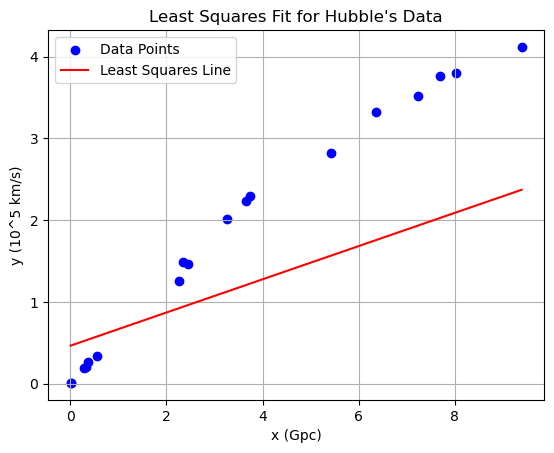

In [49]:
# Calculate a and b
a_model1, b_model1 = np.linalg.solve(A, B)

# Calculate the residual
residual_model1 = np.sum((y - (a_model1*x + b_model1))**2) # The smaller the residual, the better the fit of the model.

# Print the results
print(f"Hubble's Constant (Slope, a): {a_model1:.5f} (10^5 km/s)/Gpc")
print(f"Intercept (b): {b_model1:.5f} (10^5 km/s)")
print(f"Sum of Squares (norm of residual): {residual_model1:.5f} (10^5 km/s)^2")

# Plotting the data points and the least squares line
plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x, a_model1*x + b_model1, color='red', label='Least Squares Line')
plt.xlabel('x (Gpc)')
plt.ylabel('y (10^5 km/s)')
plt.title('Least Squares Fit for Hubble\'s Data')
plt.legend()
plt.grid(True)
plt.show()

#### (b) Model 2: y(x) = ax. 
(It is obvious that y(0) = 0). Fit this model to data with Least Squares.  
Compute the sum of squares (norm of residual). Find Hubbles constant as the slope of the curve.

In Model 2, we refine our understanding based on an important observation: the velocity of an object at a distance of \(0\) from Earth should also be \(0\). With this insight, our relationship simplifies to:
$$ y(x) = ax $$
Here:
- \( y(x) \) is the predicted velocity of a galaxy at a given distance \( x \) from Earth.
- \( a \) is the only coefficient we need to find. It still represents Hubble's constant and indicates how fast the universe is expanding.

This model suggests that as we go further from the Earth, galaxies move away from us at a speed that's directly proportional to their distance.

To determine the value of \( a \) that best fits our data, we once again use the **least squares method**. This technique aims to minimize the differences, or **residuals**, between the predicted velocities (from our model) and the observed velocities.

Mathematically, the residuals are expressed as:
$$ r = y - A \cdot p $$
Where:
- \( y \) represents the observed velocities.
- \( A \) is a matrix constructed from the known distances.
- \( p \) contains our model's parameters, which, in this case, is just \( a \).

By minimizing the **norm of the residuals**, we ensure our model represents the data as closely as possible.

After performing the least squares analysis, we can obtain:
- The best-fit value for \( a \), representing the universe's expansion rate.
- The sum of squares, which quantifies the total error between our model and the data points.


Hubble's Constant (Slope, a) for Model 2: 0.49759 (10^5 km/s)/Gpc
Sum of Squares (norm of residual) for Model 2: 1.09791 (10^5 km/s)^2


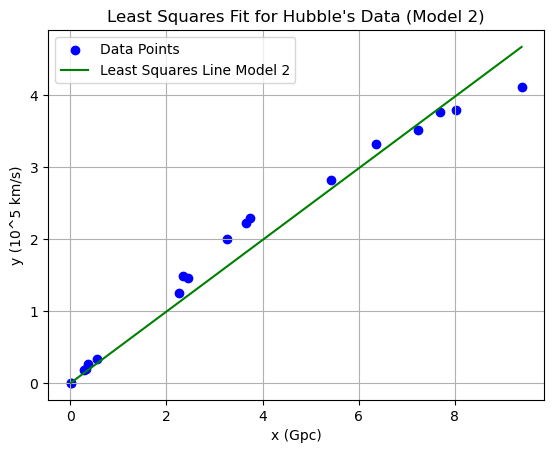

In [58]:
# Calculate a for the new model
a_model2 = sum_xy / sum_x2

# Compute the residual
residual_model2 = np.sum((y - a_model2*x)**2)

# Print the results
print(f"Hubble's Constant (Slope, a) for Model 2: {a_model2:.5f} (10^5 km/s)/Gpc")
print(f"Sum of Squares (norm of residual) for Model 2: {residual_model2:.5f} (10^5 km/s)^2")

# Plotting the data points and the least squares line for Model 2
plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x, a_model2*x, color='green', label='Least Squares Line Model 2')
plt.xlabel('x (Gpc)')
plt.ylabel('y (10^5 km/s)')
plt.title('Least Squares Fit for Hubble\'s Data (Model 2)')
plt.legend()
plt.grid(True)
plt.show()


#### (c) Model 3: y(x) = ax^2 + bx.
To check if H is really a constant or not, we try to fit a quadratic curve
with y(0) = 0. Fit this model to data with Least Squares.
Compute the sum of squares (norm of residual). Find Hubbles ’constant’
in our time, H = y′(0). Find Hubbles ’constant’ for the galaxies 9000 Mpc
away.

In Model 3, we explore a more intricate relationship by considering a **quadratic** equation to model the data:
$$ y(x) = ax^2 + bx $$
This model suggests that the expansion of the universe might not be straightforward, but instead, could be influenced by higher powers of distance.

In this equation:
- \( y(x) \) is the predicted velocity of a galaxy at a given distance \( x \) from Earth.
- \( a \) and \( b \) are coefficients we need to determine. While \( b \) is similar to the Hubble's constant from Model 2, \( a \) introduces an additional complexity that accounts for potential non-linearity in the universe's expansion.

An essential feature of this model is that \( y(0) = 0 \). This aligns with our expectation that a galaxy right at Earth would have zero velocity.

The **least squares method** is again employed to find the values of \( a \) and \( b \) that best represent our data. We strive to minimize the **residuals**, which represent the differences between the velocities predicted by our model and the actual observed velocities.

Mathematically, these residuals are defined as:
$$ r = y - A \cdot p $$
Where:
$$ 
A = \begin{bmatrix}
x_1^2 & x_1 \\
x_2^2 & x_2 \\
\vdots & \vdots \\
x_n^2 & x_n \\
\end{bmatrix}
$$
and 
$$
p = \begin{bmatrix}
a \\
b \\
\end{bmatrix}.
$$
- \( A \) is a matrix composed of the squared and linear values of known distances.
- \( p \) is a vector of our model's parameters, in this case, \( a \) and \( b \).
- \( y \) denotes the observed velocities (the vector of observed \(y_i\) values.).

**Solving with Normal Equation:**  
The coefficients vector \(p\) is found by solving the normal equation:
$$ (A^T A) \cdot p = A^T y. $$

Once we have calculated the least squares solution, we can:
- Obtain the best-fit values for \( a \) and \( b \).
- Compute the sum of squares to gauge the total deviation between our model's predictions and the observed data.

**Residuals:**
The residual is the difference between observed and predicted values. Specifically, 
$$ r = y - A \cdot p $$
and its norm gives a measure of the fit:
$$ ||r|| = \sqrt{ \sum_{i=1}^{n} r_i^2 } $$

**Hubble's Constant:** 
By deriving the model with respect to \(x\), we obtain the rate of change of \(y\) with respect to \(x\):
$$ y'(x) = 2ax + b. $$
Thus, Hubble's "constant" now, at \(x=0\), is:
$$ H_0 = y'(0) = b. $$

For the galaxies 9000 Mpc (or 9 Gpc) away, Hubble's "constant" is:
$$ H_{9000} = y'(9) = 2a \times 9 + b. $$

This model also allows us to infer the Hubble's 'constant' at different times:
- For our current time: \( H = y'(0) \), which is simply \( b \) in our model.
- For galaxies 9000 Mpc away, we can plug the distance into our derivative to get a sense of the expansion rate at that time and distance.


Quadratic Coefficients: a = -0.02597, b = 0.68248
Sum of Squares (norm of residual) for Model 3: 0.07349 (10^5 km/s)^2
Hubble's 'constant' in our time (y'(0)): 0.68248 (10^5 km/s)/Gpc
Hubble's 'constant' for the galaxies 9000 Mpc away: 0.21507 (10^5 km/s)/Gpc


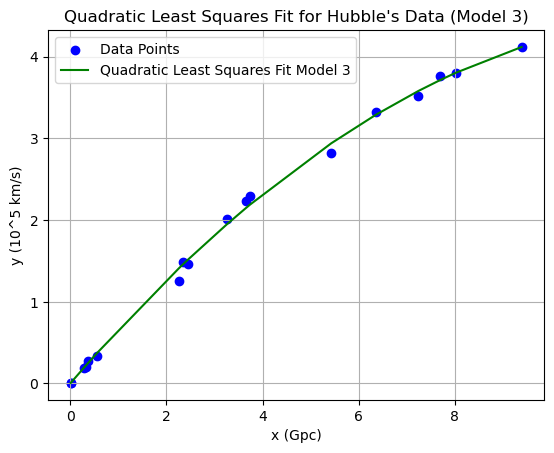

In [56]:
import numpy as np
import matplotlib.pyplot as plt

# Construct the design matrix A
A_model3 = np.vstack((x**2, x)).T   # vstack stacks vertically the matrices, and .T transposes 
                             # the resulting matrix, so the columns are x^2 and x 

# Solve for p using the normal equation
p_model3 = np.linalg.solve(A_model3.T @ A_model3, A_model3.T @ y)  # This resolves (A^T * A) * p = A^T * y with a lineal ecuation system
a_model3, b_model3 = p_model3

# Compute the residual
residual_model3 = np.sum((y - (a_model3*x**2 + b_model3*x))**2)

# Hubble's 'constant' in our time, H = y'(0)
# When evaluating this derivative in x = 0 we obtain that the Hubble constant for our time is ( b )
H_our_time = b_model3

# Hubble's 'constant' for the galaxies 9000 Mpc away
# We only have to evaluate H_9000 = y'(9), being y'(x) = 2ax + b
H_9000Mpc = 2*a_model3*9 + b_model3

# Print results
print(f"Quadratic Coefficients: a = {a_model3:.5f}, b = {b_model3:.5f}")
print(f"Sum of Squares (norm of residual) for Model 3: {residual_model3:.5f} (10^5 km/s)^2")
print(f"Hubble's 'constant' in our time (y'(0)): {H_our_time:.5f} (10^5 km/s)/Gpc")
print(f"Hubble's 'constant' for the galaxies 9000 Mpc away: {H_9000Mpc:.5f} (10^5 km/s)/Gpc")

# Plotting
plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x, a_model3*x**2 + b_model3*x, color='green', label='Quadratic Least Squares Fit Model 3')
plt.xlabel('x (Gpc)')
plt.ylabel('y (10^5 km/s)')
plt.title('Quadratic Least Squares Fit for Hubble\'s Data (Model 3)')
plt.legend()
plt.grid(True)
plt.show()


#### (d) Model 4: y(x) = ax3 + bx2 + cx. 
Fit this model and compare with Model 2. Compute the sum of squares (norm of residual).

In Model 4, we are venturing into a model that incorporates a **cubic** relationship between distance and velocity:
$$ y(x) = ax^3 + bx^2 + cx $$
This equation suggests an even more complex relationship between the distance and velocity of galaxies, allowing for a more flexible fit to our observed data.

In the equation:
- \( y(x) \) represents the predicted velocity of a galaxy at distance \( x \) from Earth.
- \( a \), \( b \), and \( c \) are coefficients that we will determine to best fit our data.

**Parameter Interpretation:**
- \( c \) resembles the Hubble's constant from Model 2, providing a linear term that indicates initial rate of expansion.
- \( a \) and \( b \) introduce additional complexity and non-linearity into the model.

**Noteworthy Feature:**
One notable aspect of this model is that \( y(0) = 0 \). This is coherent with the notion that a galaxy situated exactly at our position should have a velocity of zero.

We employ the **least squares method** to find the values of \( a \), \( b \), and \( c \) that most accurately represent our data. Our aim is to minimize the **residuals**, which are the differences between the observed velocities and the velocities predicted by our model.

Mathematically speaking, these residuals can be defined as:
$$ r = y - A \cdot p $$
Where:
$$ 
A = \begin{bmatrix}
x_1^3 & x_1^2 & x_1 \\
x_2^3 & x_2^2 & x_2 \\
\vdots & \vdots & \vdots \\
x_n^3 & x_n^2 & x_n \\
\end{bmatrix}
$$
and 
$$
p = \begin{bmatrix}
a \\
b \\
c \\
\end{bmatrix}.
$$
- \( A \) is a matrix composed of the cubed, squared, and linear values of known distances.
- \( p \) is a vector of the parameters of our model, namely \( a \), \( b \), and \( c \).
- \( y \) represents the observed velocities (the vector of observed \(y_i\) values).

**Least Squares Solution:**  
The coefficients vector \(p\) is found by utilizing a least squares solving method, which might utilize algorithms beyond the scope of the normal equation to handle potential numerical instability or issues with the condition of the matrix.

After computing the least squares solution, we can:
- Acquire the best-fit values for \( a \), \( b \), and \( c \).
- Compute the norm of residuals to understand the total discrepancy between our model's predictions and the observed data.

**Residuals:**
The residual is given by
$$ r = y - A \cdot p $$
and its norm offers a measure of the model's fit:
$$ ||r|| = \sqrt{ \sum_{i=1}^{n} r_i^2 } $$

**Hubble's Constant:** 
To infer Hubble's 'constant' at different points, we derive the model with respect to \(x\) to get the rate of change of \(y\) with respect to \(x\):
$$ y'(x) = 3ax^2 + 2bx + c. $$
Thus, Hubble's "constant" at \(x=0\) is:
$$ H_0 = y'(0) = c. $$

**Comparisons:**
Comparisons between this model and others (like Model 2) can be conducted by evaluating:
- The residuals and their norms.
- Visual inspection of plotted models and data.
- Considering the implications and physical meanings of the fitted parameters.

After obtaining the least squares solution, we can derive:
- The best-fit values for our coefficients \( a \), \( b \), and \( c \).
- The total sum of squares, which gives an idea of how well our cubic model fits the observed data compared to simpler models.


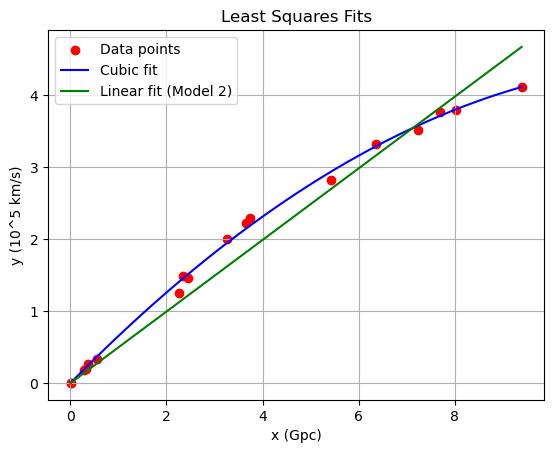

Norm of residual for cubic fit: 0.2710 (10^5 km/s)^2
Sum of Squares (norm of residual) for Model 2: 1.09791 (10^5 km/s)^2
Hubble's constant for cubic model at x=0: 0.6803 (10^5 km/s)/Gpc
Hubble's Constant (Slope, a) for Model 2 at x=0: 0.49759 (10^5 km/s)/Gpc


In [61]:
import numpy as np
import matplotlib.pyplot as plt

# Construct the matrix A and vector y for cubic fit
A_cubic = np.vstack([np.power(x, 3), np.power(x, 2), x]).T # vstack stacks vertically the matrices, and .T transposes 
                                                           # the resulting matrix, so the columns are x^2 and x 

p_cubic = np.linalg.lstsq(A_cubic, y, rcond=None)[0]
residuals_cubic = y - np.dot(A_cubic, p_cubic)
norm_residual_cubic = np.linalg.norm(residuals_cubic)

# The same as model 2
a_linear_model2 = a_model2
residual_linear_model2 = residual_model2

# Plotting
x_vals = np.linspace(min(x), max(x), 1000)
y_vals_cubic = p_cubic[0]*x_vals**3 + p_cubic[1]*x_vals**2 + p_cubic[2]*x_vals
y_vals_linear = p_linear[0]*x_vals

plt.scatter(x, y, color='red', label='Data points')
plt.plot(x_vals, y_vals_cubic, label='Cubic fit', color='blue')
plt.plot(x_vals, y_vals_linear, label='Linear fit (Model 2)', color='green')
plt.xlabel('x (Gpc)')
plt.ylabel('y (10^5 km/s)')
plt.legend()
plt.title('Least Squares Fits')
plt.grid(True)
plt.show()

print(f"Norm of residual for cubic fit: {norm_residual_cubic:.4f} (10^5 km/s)^2")
print(f"Sum of Squares (norm of residual) for Model 2: {residual_linear_model2:.5f} (10^5 km/s)^2")

# Hubble's constant for the cubic model at x=0 is just the coefficient c
print(f"Hubble's constant for cubic model at x=0: {p_cubic[2]:.4f} (10^5 km/s)/Gpc")
print(f"Hubble's Constant (Slope, a) for Model 2 at x=0: {a_linear:.5f} (10^5 km/s)/Gpc")


#### Comparison of Model 4 and Model 2

Given the results:
- **Model 4 (Cubic Fit)**:
  - Norm of residual: $$0.2710 \times 10^5 \, \text{km/s}^2$$
  - Hubble's constant at x=0: $$0.6803 \times 10^5 \, \text{km/s/Gpc}$$

- **Model 2 (Linear Fit)**:
  - Norm of residual: $$1.09791 \times 10^5 \, \text{km/s}^2$$
  - Hubble's constant at x=0: $$0.49759 \times 10^5 \, \text{km/s/Gpc}$$

##### Interpretations and Conclusions:

1. **Residual Comparison**:
   
   The norm of residual represents the magnitude of the difference between the observed velocities and the velocities predicted by our models. A smaller value indicates a better fit.
   - Model 4 has a considerably **lower** residual: $$0.2710 \times 10^5 \, \text{km/s}^2$$ compared to Model 2: $$1.09791 \times 10^5 \, \text{km/s}^2$$ This implies that the cubic model (Model 4) fits the data more accurately than the linear model (Model 2).  

2. **Hubble's Constant**:
   
   Hubble's constant provides an estimation of the rate of expansion of the universe. For both models, the value of Hubble's constant is determined at x=0.
   - The cubic model (Model 4) estimates Hubble's constant to be $$0.6803 \times 10^5 \, \text{km/s/Gpc}$$ whereas the linear model (Model 2) estimates it as $$0.49759 \times 10^5 \, \text{km/s/Gpc}$$ This indicates that the two models predict different rates of cosmic expansion in the current era.
   
3. **Overall Conclusion**:
   
   The cubic fit (Model 4) seems to be a **better representation** of the data, as suggested by its lower residual. This could mean that the relationship between distance and velocity might not be purely linear but has some higher order components.
   - The difference in Hubble's constant between the two models indicates the importance of model selection. A more accurate model can provide more precise estimations about universal properties like the rate of cosmic expansion.


#### Problem 4

**(a)** Assume that Chebyshev interpolation is used to find a   fifth degree interpolating polynomial \( Q_5(x) \) on the interval \([-1, 1]\) for the function 
$$ f(x) = e^x $$
Use the interpolation error formula to find a worst-case estimate for the error 
$$ |e^x - Q_5(x)| $$
that is valid for \( x \) throughout the interval \([-1,1]\).


In [17]:
import numpy as np

# Compute the Chebyshev Nodes for n=5
def chebyshev_nodes(n):
    '''Compute the Chebyshev nodes for a given n.'''
    return [np.cos((2*i-1)*np.pi/(2*n)) for i in range(1, n+2)]

# Define the error function E(x)
def error_function(x, nodes):
    '''Compute the error function E(x) using the product of differences.'''
    product = np.prod([x - node for node in nodes])
    # Given that f(x) = e^x, the 6th derivative is still e^x
    return (np.exp(x) / np.math.factorial(6)) * product

# Compute E(x) at the interval endpoints and at each Chebyshev node
def errors(n):
    '''Compute the maximum absolute error using Chebyshev nodes and E(x).'''
    nodes = chebyshev_nodes(n)
    values_to_check = [-1, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
    errors = [abs(error_function(x, nodes)) for x in values_to_check]
    return errors

# Execution
n = 5
print(f"All the errors for n={n} in the interval [-1, 1]: {(errors(n))}")
print(f"\nWorst-case error for n={n} in the interval [-1, 1]: {max(errors(n))}")



All the errors for n=5 in the interval [-1, 1]: [1.562960193951602e-06, 1.139096921364147e-06, 5.874877662694989e-06, 7.260352834732271e-06, 1.2683706820403081e-06, 1.187411486094538e-05, 2.8339978931201994e-05, 4.182068903571639e-05, 4.511070584583322e-05, 3.209685291947728e-05, 2.527578816165565e-20, 4.8416012253958074e-05, 0.00010313865048996674, 0.00014642866820140554, 0.00015463666779923067, 0.00010383627358523639, 1.8605877488829857e-05, 0.00019362455956625888, 0.00033731114991635073, 0.00024983843210657855, 0.00046037512799841385]

Worst-case error for n=5 in the interval [-1, 1]: 0.00046037512799841385


#### (b) Answer the same questions as in (a), but for the interval [0.6, 1.0].

In [27]:
import numpy as np

# Compute the Chebyshev Nodes for n=5
def transformed_chebyshev_nodes(n, a, b):
    '''Compute the Chebyshev nodes for a given n and an interval [a, b].'''
    standard_nodes = [np.cos((2*i-1)*np.pi/(2*n)) for i in range(1, n+2)]
    return [a + 0.5*(b-a)*(node + 1) for node in standard_nodes]

# Define the error function E(x)
def error_function(x, nodes):
    '''Compute the error function E(x) using the product of differences.'''
    product = np.prod([x - node for node in nodes])
    # Given that f(x) = e^x, the 6th derivative is still e^x
    return (np.exp(x) / np.math.factorial(6)) * product

# Compute E(x) at the interval endpoints and at each Chebyshev node
def errors(n, a, b):
    '''Compute the maximum absolute error using Chebyshev nodes and E(x).'''
    nodes = transformed_chebyshev_nodes(n, a, b)
    values_to_check = [0.6, 0.7, 0.8, 0.9, 1]
    errors = [abs(error_function(x, nodes)) for x in values_to_check]
    return errors

# Execution for the interval [0.6, 1.0]
a, b = 0.6, 1.0
n = 5

print(f"All the errors for n={n} in the interval [0.6, 1]: {(errors(n, a, b))}")
print(f"\nWorst-case error for n={n} in the interval [0.6, 1]: {max(errors(n, a, b))}")



All the errors for n=5 in the interval [0.6, 1]: [4.954491211955947e-10, 2.5231007803098977e-09, 0.0, 9.913953116511472e-09, 2.946400819189841e-08]

Worst-case error for n=5 in the interval [0.6, 1]: 2.946400819189841e-08
